<a href="https://colab.research.google.com/github/ElielLucas/Digital-Image-Processing/blob/main/AED4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw, ImageFilter
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimage
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import os
from natsort import natsorted
import skimage
import time

<ipython-input-1-3ca2bbe4cc19>:6: UserWarning: Viewer requires Qt
  from skimage import color, viewer, exposure, img_as_float, data


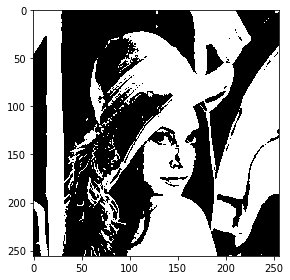

(<matplotlib.image.AxesImage at 0x7fb3a3ffb5e0>, None)

In [ ]:
im = cv2.imread("/content/lena_gray.bmp")
N, M, _ = im.shape

# Converter imagem para o formato de cor LAB
imagem_LAB= cv2.cvtColor(im, cv2.COLOR_BGR2LAB)
CANAL_L, CANAL_A, CANAL_B = cv2.split(imagem_LAB)
# Altera o contraste da imagem
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(2,2))
imagem_LAB_clahe = clahe.apply(CANAL_L)
aux = cv2.merge((imagem_LAB_clahe,CANAL_A,CANAL_B))
imagem_contraste_melhorado = cv2.cvtColor(aux, cv2.COLOR_LAB2BGR)

# Converter imagem para o formato de cor GRAY
gray_img=cv2.cvtColor(imagem_contraste_melhorado,cv2.COLOR_BGR2GRAY)
# Realiza a equalização de histograma na imagem
equa_histograma = cv2.equalizeHist(gray_img[:,:])

# Cria 4 matrizes que serão um quadrante, cada, da imagem original
q1 = np.zeros((int(N/2), int(M/2)), dtype='uint8')
q2 = np.zeros((int(N/2), int(M/2)), dtype='uint8')
q3 = np.zeros((int(N/2), int(M/2)), dtype='uint8')
q4 = np.zeros((int(N/2), int(M/2)), dtype='uint8')

for i in range(N):
  for j in range(M):
      if i < int(N/2) and j < int(M/2):
          q1[i%int(N/2), j%int(M/2)] = equa_histograma[i, j]
      elif i >= int(N/2) and j < int(M/2):
          q2[i%int(N/2), j%int(M/2)] = equa_histograma[i, j]
      elif i < int(N/2) and j >= int(M/2):
          q3[i%int(N/2), j%int(M/2)] = equa_histograma[i, j]
      elif i >= int(N/2) and j >= int(M/2):
          q4[i%int(N/2), j%int(M/2)] = equa_histograma[i, j]

_, otsu1 = cv2.threshold(q1, 80, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, otsu2 = cv2.threshold(q2, 80, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, otsu3 = cv2.threshold(q3, 80, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, otsu4 = cv2.threshold(q4, 80, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

output = np.zeros((N, M), dtype='uint8')
for i in range(N):
    for j in range(M):
        if i < int(N/2) and j < int(M/2):
          output[i, j] = otsu1[i%int(N/2), j%int(M/2)]
        elif i >= int(N/2) and j < int(M/2):
          output[i, j] = otsu2[i%int(N/2), j%int(M/2)]
        elif i < int(N/2) and j >= int(M/2):
          output[i, j] = otsu3[i%int(N/2), j%int(M/2)]
        elif i >= int(N/2) and j >= int(M/2):
          output[i, j] = otsu4[i%int(N/2), j%int(M/2)]


imshow(output), show()

